In [ ]:


import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_excel('Data_Pigment.xlsx')
df

,Lat,Lon,Day,Month,Year,Chla,Chlb,19Hf,19Bf,Fuco,Perid,Allo,Zea
0,48.67283,-8.44898,9,17,1997,0.33206,0.00000,0.11931,0.03506,0.02940,0.02220,0.00000,0.01313
1,48.67283,-8.44898,9,17,1997,0.35777,0.00000,0.15785,0.03942,0.02810,0.01777,0.00000,0.01722
2,48.67283,-8.44898,9,17,1997,0.45538,0.00000,0.15681,0.03332,0.02860,0.01427,0.00000,0.01260
3,48.67283,-8.44898,9,17,1997,0.77354,0.00000,0.41115,0.08445,0.05114,0.02363,0.00000,0.00937
4,47.98378,-13.20512,9,18,1997,0.32851,0.00864,0.13750,0.03743,0.01040,0.00520,0.00801,0.06553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,43.36700,7.89900,11,8,2005,0.33740,0.07460,0.06870,0.02430,0.01320,0.00760,0.00470,0.07540
11160,43.37400,7.88300,11,13,2009,0.24470,0.03180,0.07090,0.02410,0.01140,0.00620,0.00260,0.05210
11161,43.37600,7.88600,11,15,2009,0.23990,0.03940,0.06850,0.02170,0.01070,0.00600,0.00180,0.04810
11162,43.36700,7.90600,12,12,2013,0.42080,0.08600,0.10220,0.05310,0.02980,0.00370,0.01000,0.04090


In [ ]:
#df['Day']=df['Day'].astype('category')
#df['Day']=df['Day'].cat.codes

In [ ]:
df.isnull().sum()

Lat      0
Lon      0
Day      0
Month    0
Year     0
Chla     0
Chlb     0
19Hf     0
19Bf     0
Fuco     0
Perid    0
Allo     0
Zea      0
dtype: int64

In [ ]:
#X=df.drop(columns='Chla')
X=df[['Chlb','19Hf','19Bf','Fuco','Perid','Allo','Zea']]
y=df['Chla']
X

,Chlb,19Hf,19Bf,Fuco,Perid,Allo,Zea
0,0.00000,0.11931,0.03506,0.02940,0.02220,0.00000,0.01313
1,0.00000,0.15785,0.03942,0.02810,0.01777,0.00000,0.01722
2,0.00000,0.15681,0.03332,0.02860,0.01427,0.00000,0.01260
3,0.00000,0.41115,0.08445,0.05114,0.02363,0.00000,0.00937
4,0.00864,0.13750,0.03743,0.01040,0.00520,0.00801,0.06553
...,...,...,...,...,...,...,...
11159,0.07460,0.06870,0.02430,0.01320,0.00760,0.00470,0.07540
11160,0.03180,0.07090,0.02410,0.01140,0.00620,0.00260,0.05210
11161,0.03940,0.06850,0.02170,0.01070,0.00600,0.00180,0.04810
11162,0.08600,0.10220,0.05310,0.02980,0.00370,0.01000,0.04090


In [ ]:

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_test

9010     0.061000
8761     0.029000
7860     1.065000
8713     0.191000
9967     0.400000
           ...   
3991     0.058000
2664     0.296643
10009    0.490000
7297     0.599899
6141     0.022089
Name: Chla, Length: 3350, dtype: float64

In [ ]:

lr=LinearRegression()
lr.fit(X_train,y_train)
m=lr.coef_
print(m)

[ 2.11511472  0.47998603 -0.03102981  0.4123735   3.01604267  2.11717266
  1.9008807 ]


In [ ]:
c=lr.intercept_
c

0.30157868751498174

In [ ]:
y_pred_test=lr.predict(X_test)
y_pred_test

array([0.37458194, 0.36392997, 1.32891907, ..., 0.65459051, 0.63343107,
       0.33637656])

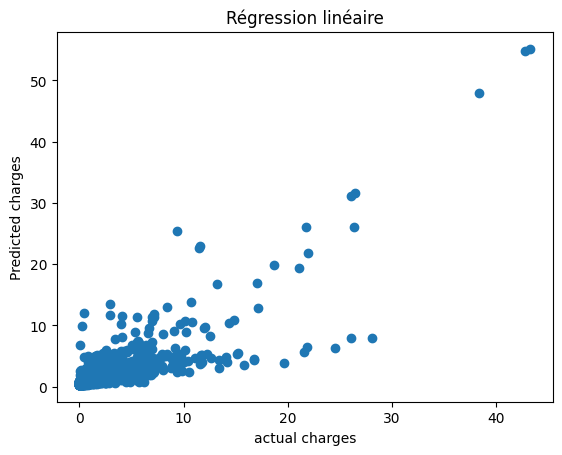

In [ ]:

plt.scatter(y_test ,y_pred_test )
plt.xlabel('actual charges')
plt.ylabel('Predicted charges')
plt.title('Régression linéaire')
plt.show()

In [ ]:

r2_score(y_test,y_pred_test)

0.6756633250725155

In [ ]:
X = X_train
Y = y_train

In [ ]:

# Standardiser les données pour avoir une moyenne de 0 et un écart type de 1
#Y = np.array((Y - Y.mean()) / Y.std())
#X = X.apply(lambda rec: (rec - rec.mean()) / rec.std(), axis=0)



In [ ]:
# Calculer les paramètres de régression en utilisant la méthode des moindres carrés
X_transpose = X.transpose()
X_transpose_X = np.dot(X_transpose, X)
X_transpose_Y = np.dot(X_transpose, Y)
theta = np.dot(np.linalg.inv(X_transpose_X), X_transpose_Y)
b = Y.mean() - np.dot(X.mean(), theta)



In [ ]:
# Afficher les paramètres estimés
print('Bias:', b, 'Weights:', theta)



Bias: 0.213430486949434 Weights: [2.26143797 0.55959924 0.23301541 0.43212339 3.02129067 2.31305448
 2.74663729]


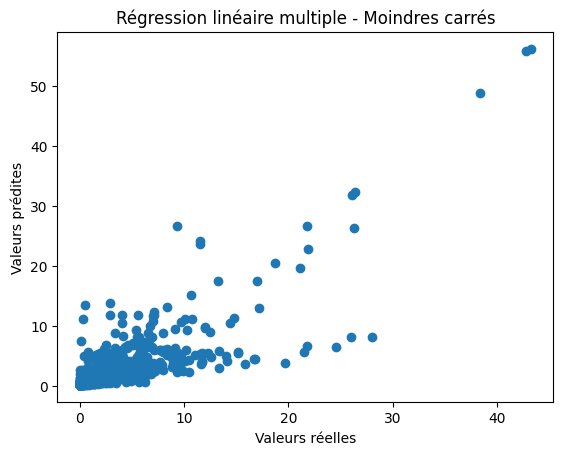

In [ ]:
# Prédire les valeurs de Y à l'aide des paramètres estimés
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_pred =predict_Y(b,theta,X_test)
Y_pred

# Afficher le graphique
plt.scatter(y_test, Y_pred)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Régression linéaire multiple - Moindres carrés')
plt.show()

In [ ]:

print( 'score_moindre_carrés : ', r2_score(y_test,y_pred_test))

score_moindre_carrés :  0.6756633250725155


In [ ]:
r_square = (sum((y_pred_test - y_test) ** 2)) / (0.3 * 11164)
print(r_square)

2.287842942706477


In [ ]:

# 2_   gradient descente

# Standardiser les données pour avoir une moyenne de 0 et un écart type de 1
#Y=np.array((Y-Y.mean())/Y.std())
#X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
#X.head()
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta

b,theta=initialize(7)
print('Bias: ',b, '\nWeights:' ,theta)


# Nouvelle section

In [ ]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X_test)
Y_hat
import math

In [ ]:
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1
#print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
#print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)
def run_gradient_descent(X,Y,alpha,num_iterations):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num +=1
  #  print('Final Estimate of b and theta :',b,theta)
    return gd_iterations_df,b,theta
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)
print('Bias: ',b, '\nWeights:' ,theta)

In [ ]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

In [ ]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label='alpha=0.01')
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label='alpha=0.001')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

In [ ]:
r_square = (sum((y_pred_test - y_test) ** 2)) / (0.3 * 11164)
print(r_square)

In [ ]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#define model
model = RidgeCV(alphas=arange(0.001, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
#fit model
model.fit(X,Y)
#display lambda that produced the lowest test MSE
print(model.alpha_)



In [ ]:
y_pred_ridge=model.predict(X_test)
print('y_pred_test : ', y_pred_ridge)

In [ ]:
# Afficher le graphique
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Régression linéaire - Ridge')
plt.show()

In [ ]:
r_square = (sum((y_pred_ridge - y_test) ** 2)) / (0.3 * 11164)
print(r_square)